<a href="https://colab.research.google.com/github/harsh-tambi/Deep_Learning_FMNIST/blob/main/RNN_TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [30]:
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam


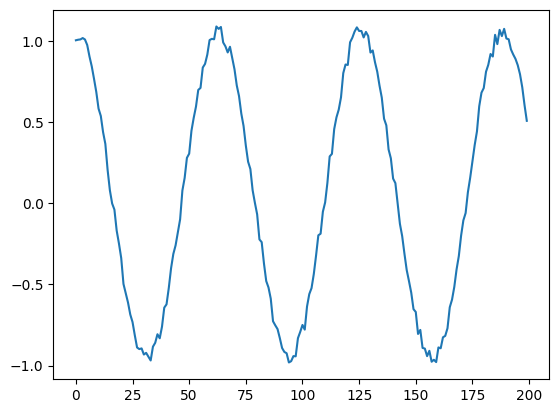

200

In [31]:
#making our original data
time_series = np.cos(0.1*np.arange(200)) + np.random.rand(200)*0.1
plt.plot(time_series)
plt.show()
len(time_series)

In [32]:
T = 10
D = 1
X = []
Y = []
for t in range(len(time_series)-T):
  x = time_series[t:t+T]
  X.append(x)
  y = time_series[t+T]
  Y.append(y)


X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)
N = len(X)


In [33]:
#here we build our own RNN model
i = Input(shape = (T, 1))
x = SimpleRNN(5, activation='relu')(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
    loss='mse',
    optimizer=Adam(lr=0.1)
)


r = model.fit(X[:-N//2], Y[:-N//2], validation_data=(X[-N//2:], Y[-N//2:]), epochs=80)

Epoch 1/80
3/3 [==============================] - 2s 134ms/step - loss: 0.6760 - val_loss: 0.5007
Epoch 2/80
3/3 [==============================] - 0s 28ms/step - loss: 0.6182 - val_loss: 0.4670
Epoch 3/80
3/3 [==============================] - 0s 24ms/step - loss: 0.5759 - val_loss: 0.4396
Epoch 4/80
3/3 [==============================] - 0s 25ms/step - loss: 0.5408 - val_loss: 0.4172
Epoch 5/80
3/3 [==============================] - 0s 24ms/step - loss: 0.5173 - val_loss: 0.3976
Epoch 6/80
3/3 [==============================] - 0s 22ms/step - loss: 0.4970 - val_loss: 0.3811
Epoch 7/80
3/3 [==============================] - 0s 26ms/step - loss: 0.4794 - val_loss: 0.3664
Epoch 8/80
3/3 [==============================] - 0s 21ms/step - loss: 0.4639 - val_loss: 0.3530
Epoch 9/80
3/3 [==============================] - 0s 29ms/step - loss: 0.4502 - val_loss: 0.3404
Epoch 10/80
3/3 [==============================] - 0s 21ms/step - loss: 0.4367 - val_loss: 0.3289
Epoch 11/80
3/3 [===========

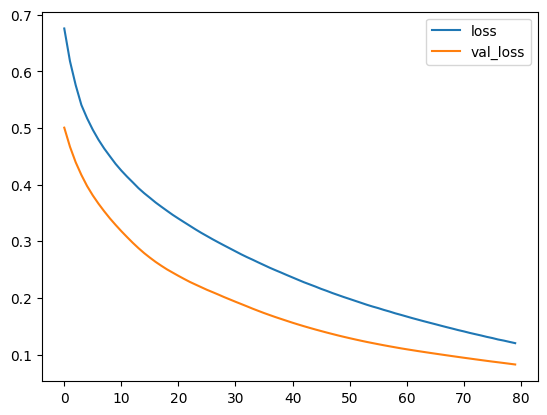

In [34]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()


In [35]:
validation_target = Y[-N//2:]
validation_predictions = []

last_x = X[-N//2]

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1, 1))[0, 0]
  validation_predictions.append(p)
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

1/1 [==============================] - 0s 33ms/step


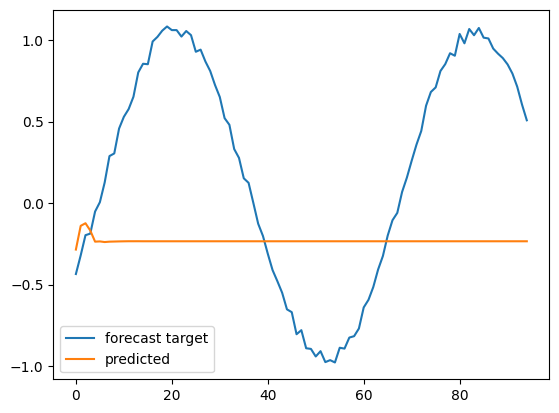

In [36]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='predicted')
plt.legend()
plt.show()